# Proyek NLP - [Klasifikasi Komentar Judi Online]

**Judul Proyek :** HAJAR (Hapus Judi Online Anti Ribet)

**ID Team :** CC25-CF230

**Anggota Team :**

1. (ML) MC009D5Y0493 - Ahmad Zaky Humami – Universitas Gunadarma - Aktif
2. (ML) MC009D5Y0506 - Fahru Rahman – Universitas Gunadarma - Aktif
3. (ML) MC314D5X1177 - Shofi Shulhiyana – Universitas Singaperbangsa Karawang - Aktif
4. (FEBE) FC009D5Y0885 - Muhammad Faris Rasyid Raharjo - Universitas Gunadarma  Aktif
5. (FEBE) FC314D5Y1568 - Fahry Firdaus Marpaung - Universitas Singaperbangsa Karawang - Aktif
6. (FEBE) FC009D5Y1828 - Linggar Riza Hamretta - Universitas Gunadarma - Aktif


## Proyek Overview
YouTube merupakan salah satu platform media sosial berbasis video terbesar di dunia yang memungkinkan penggunanya untuk dapat saling berinteraksi melalui kolom komentar. Namun, akhir-akhir ini kolom komentar pada konten video YouTube sering disalahgunakan oleh pihak yang tidak bertanggungjawab untuk menyebarkan konten spam dan promosi seputar judi online. Komentar tersebut mengganggu kenyamanan pengguna ketika ingin berdiskusi di kolom komentar dan berpotensi membahayakan jika terdapat tautan ke situs judi online tersebut. Pelaku spam juga kerap menggunakan kata-kata tersamar, dan simbol.

Mengapa Masalah Ini Harus Diselesaikan :
1.  **Mengganggu Kenyamanan Pengguna**: Kolom komentar yang disalahgunakan dapat mengganggu kenyamanan pengguna ketika ingin berdiskusi di kolom komentar. Hal ini dapat mengurangi pengalaman pengguna dan membuat mereka tidak ingin kembali ke platform tersebut.
2.  **Bahaya Konten Judi Online**: Konten judi online dapat membahayakan pengguna, terutama anak-anak dan remaja yang masih belum dewasa. Mereka mungkin tidak memiliki pengetahuan yang cukup untuk mengenali bahaya konten tersebut dan dapat terjebak dalam situasi yang tidak diinginkan. Selain itu, konten judi online juga dapat membahayakan pengguna yang sudah dewasa karena dapat menyebabkan kecanduan dan masalah keuangan. 


## Business Understanding

### Problem Statements
1. 
2. 
3. 

### Goals
1. 
2. 
3. 

## Data Understanding

### Import Library


In [461]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Text preprocessing
import unicodedata
import emoji
import string
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from ftfy import fix_text


# Vectorizers
from sklearn.feature_extraction.text import TfidfVectorizer

# Train/test split & metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report

# Classical ML models
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

# Word2Vec embeddings
import gensim
from gensim.models import Word2Vec

# Deep learning with TensorFlow/Keras
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import TextVectorization, Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [462]:
nltk.download('punkt_tab', download_dir='C:/nltk_data')
nltk.download('punkt', download_dir='C:/nltk_data')
nltk.download('stopwords', download_dir='C:/nltk_data')
nltk.data.path.append('C:/nltk_data')

[nltk_data] Downloading package punkt_tab to C:/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to C:/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Load Dataset

Dataset For Training

In [463]:
df1 = pd.read_csv('Datasets/youtube_comments.csv')
df2 = pd.read_csv('Datasets/komentar_judi.csv')
df3 = pd.read_csv('Datasets/komentar_judi2.csv')

### Deskripsi Variables

Variabel | Keterangan
----------|----------
Author | Unique username.
Comment  | user comments from YouTube videos.

In [464]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8033 entries, 0 to 8032
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   author   8032 non-null   object
 1   comment  8033 non-null   object
dtypes: object(2)
memory usage: 125.6+ KB


In [465]:
df1.isnull().sum()

author     1
comment    0
dtype: int64

In [466]:
print("Duplicated : ", df1.duplicated().sum())

Duplicated :  27


In [467]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3802 entries, 0 to 3801
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   author   3802 non-null   object
 1   comment  3802 non-null   object
dtypes: object(2)
memory usage: 59.5+ KB


In [468]:
df2.isnull().sum()

author     0
comment    0
dtype: int64

In [469]:
print("Duplicated : ", df2.duplicated().sum())

Duplicated :  0


In [470]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   author   4312 non-null   object
 1   comment  4311 non-null   object
dtypes: object(2)
memory usage: 67.5+ KB


In [471]:
df3.isnull().sum()

author     0
comment    1
dtype: int64

In [472]:
print("Duplicated : ", df3.duplicated().sum())

Duplicated :  321


#### Handling Missing Values


In [473]:
df1 = df1.dropna()

print("Missing values after dropping NaNs:")
print("Dataset 1 missing values:\n", df1.isnull().sum())

Missing values after dropping NaNs:
Dataset 1 missing values:
 author     0
comment    0
dtype: int64


In [474]:
df2 = df2.dropna()

print("Missing values after dropping NaNs:")
print("Dataset 2 missing values:\n", df2.isnull().sum())

Missing values after dropping NaNs:
Dataset 2 missing values:
 author     0
comment    0
dtype: int64


In [475]:
df3 = df3.dropna()

print("Missing values after dropping NaNs:")
print("Dataset 3 missing values:\n", df3.isnull().sum())

Missing values after dropping NaNs:
Dataset 3 missing values:
 author     0
comment    0
dtype: int64


### Merge Dataset

In [476]:
df_combined = pd.concat([df1, df2, df3], ignore_index=True)

In [477]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16145 entries, 0 to 16144
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   author   16145 non-null  object
 1   comment  16145 non-null  object
dtypes: object(2)
memory usage: 252.4+ KB


In [478]:
df_combined.head(100)

,author,comment
0,@HenhenDrodro,Yg belain org stres pasti g jauh klo g ODGJ y...
1,@merahkhatulistiwa9603,ijazah jokowi itu asli ...penelaah ilmiah itu ...
2,@RinaManroe,Senyum2 Bae
3,@DWPSCHANEL,Tangkap lah males dengernya …ribet
4,@dediharyanto9746,"Ga peduli sama ROY dan JOKOWI, dari sini udah ..."
...,...,...
95,@franqm5625,Asli roy ni kayak perempuan....
96,@kepobangetlu25,Muka nya fimanto dgn Jokowi aja beda jauh gmn ...
97,@DwiNugroho-x9h,Tertawa lah kau roy.... Sebentar lagi kau nang...
98,@STORIEKIWARAS,RS cs . .akan terus memburu hadiah 6m..\nYg di...


Missing Values

In [479]:
df_combined.isnull().sum()

author     0
comment    0
dtype: int64

## Data Preprocessing

In [480]:
# Drop a one word comment
df_combined = df_combined[df_combined['comment'].str.split().str.len() > 1]

Hapus missing values

In [481]:
# Remove rows with any missing values
df_combined.dropna(inplace=True)

print("Missing values per column: \n")
print(df_combined.isnull().sum())

Missing values per column: 

author     0
comment    0
dtype: int64


### Cleaning text

In [482]:
# Converting all the characters in a text into lower case
def casefoldingText(text):
      return text.lower()

In [483]:
def normalize_unicode_to_ascii(text):
      """Normalize text to ASCII, preserving spaces"""
      text = fix_text(text)

      if isinstance(text, str):
            # Normalize Unicode to decomposed form
            text = unicodedata.normalize('NFKD', text)
            # Ganti karakter non-ASCII dengan spasi daripada menghapusnya
            text = ''.join(ch if ord(ch) < 128 else ' ' for ch in text)

      return text

print(normalize_unicode_to_ascii("gachoг m𝘶lu ԁi 𝘿𝙊 𝙍 𝘼 𝟳 𝟳🙍!"))
print(normalize_unicode_to_ascii("Pngguna bru 🛑𝐊𝗨𝐒𝗨𝐌𝗔𝐓𝟬𝐓𝟬🚦,pm aja"))
print(normalize_unicode_to_ascii("Gaji numpang lewat? Biarin, ada ♛𝗔𝗦𝗜𝗔𝗚𝗘𝗡𝗧𝗜𝗡𝗚♛"))
print(normalize_unicode_to_ascii("😎: Betul Bro ⚡𝗦𝗨𝗣𝗘𝗥𝗠𝗢𝗡𝗘𝗬𝟴𝟴⚡⚡𝗦𝗨𝗣𝗘𝗥𝗠𝗢𝗡𝗘𝗬𝟴𝟴⚡"))

gacho  mulu  i DO R A 7 7 !
Pngguna bru  KUSUMAT0T0 ,pm aja
Gaji numpang lewat? Biarin, ada  ASIAGENTING 
 : Betul Bro  SUPERMONEY88  SUPERMONEY88 


In [484]:
# Function untuk Cleaning Text
def cleaningText(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove mentions (@username)
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags (#hashtag)
    text = re.sub(r'#\w+', '', text)

    # Remove the numbers, but keep the numbers attached to the word
    # text = re.sub(r'\b\d+\b', '', text)
    
    # Remove non-alphanumeric characters at the beginning or end of the string
    # text = re.sub(r'^[^a-zA-Z0-9]+|[^a-zA-Z0-9]+$', ' ', text)

    text = text.translate(str.maketrans(' ', ' ', string.punctuation)) # remove all punctuations
    
    text = text.replace('\n', ' ')
    text = re.sub(r'[^\w\s]', ' ', text)# replace new line into space
    text = re.sub(r'\s+', ' ', text).strip() # remove characters space from both left and right text
    
    text = re.sub(r'(\b[a-z]+) (\d+\b)', r'\1\2', text)

    return text

print(cleaningText(normalize_unicode_to_ascii("gachoг m𝘶lu ԁi 𝘿𝙊 𝙍 𝘼 𝟳 𝟳🙍!")))
print(cleaningText(normalize_unicode_to_ascii("Pngguna bru 🛑𝐊𝗨𝐒𝗨𝐌𝗔𝐓𝟬𝐓𝟬🚦,pm aja")))
print(cleaningText(normalize_unicode_to_ascii("Gaji numpang lewat? Biarin, ada ♛𝗔𝗦𝗜𝗔𝗚𝗘𝗡𝗧𝗜𝗡𝗚♛")))
print(cleaningText(normalize_unicode_to_ascii("😎: Betul Bro ⚡𝗦𝗨𝗣𝗘𝗥𝗠𝗢𝗡𝗘𝗬𝟴𝟴⚡⚡𝗦𝗨𝗣𝗘𝗥𝗠𝗢𝗡𝗘𝗬𝟴𝟴⚡")))

gacho mulu i DO R A 7 7
Pngguna bru KUSUMAT0T0 pm aja
Gaji numpang lewat Biarin ada ASIAGENTING
Betul Bro SUPERMONEY88 SUPERMONEY88


### Tokenizing text

In [485]:
def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

### Removing Stopwords

In [486]:
def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

### Stemming text

In [487]:
def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

### Convert to sentence

In [488]:
def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

### Correcting the slang words

In [489]:
def fix_slangwords(text):
    if not isinstance(text, str):
        return ""

    slang_dict = {
        # Negasi & Penyangkalan
        "gk": "tidak", "gak": "tidak", "ga": "tidak", "g": "tidak", "nggak": "tidak", "enggak": "tidak",
        "gpp": "tidak apa-apa", "gakpapa": "tidak apa-apa", "gabut": "tidak ada kerjaan",

        # Penghubung & Penjelas
        "tp": "tetapi", "tapi": "tetapi", "kl": "kalau", "klw": "kalau", "kalo": "kalau", "krn": "karena",
        "karena": "karena", "jd": "jadi", "jg": "juga", "aja": "saja", "sih": "", "kok": "mengapa",
        "dl": "dulu", "pdhl": "padahal", "btw": "ngomong-ngomong", "spt": "seperti",

        # Kata ganti orang
        "sy": "saya", "gw": "saya", "gue": "saya", "gua": "saya", "w": "saya", "gwe": "saya",
        "q": "aku", "ak": "aku", "aq": "aku", "km": "kamu", "lu": "kamu", "lo": "kamu", "elo": "kamu",
        "elu": "kamu", "loe": "kamu", "u": "kamu", "i": "saya", "tmn": "teman", "tmn2": "teman-teman",

        # Kata kerja / tindakan
        "udh": "sudah", "udah": "sudah", "sdh": "sudah", "lg": "lagi", "bikin": "membuat",
        "ksih": "kasih", "ksh": "kasih", "jgn": "jangan", "jangan": "jangan", "biar": "agar",
        "supaya": "agar", "bisa": "bisa", "bs": "bisa", "bsa": "bisa", "sabi": "bisa", "dlm": "dalam",

        # Kata benda / objek
        "org": "orang", "modal": "uang", "cuan": "untung", "bonus": "hadiah", "jp": "jackpot",
        "jepe": "jackpot", "jepey": "jackpot", "slot": "permainan judi", "betting": "taruhan",
        "promo": "promosi", "event": "acara", "depo": "deposit", "wd": "withdraw",

        # Emosi dan ekspresi informal
        "anjay": "astaga", "anjir": "astaga", "anjrit": "astaga", "wkwk": "haha", "wkwkwk": "haha",
        "wk": "haha", "lol": "haha", "ngakak": "tertawa", "baper": "terbawa perasaan",
        "kepo": "penasaran", "julid": "iri", "gibah": "bergosip", "santuy": "santai", "woles": "santai",
        "mager": "malas", "lebay": "berlebihan", "pecah": "seru", "ngablu": "mengigau", "cape": "capek",
        "capekkk": "capek", "pusinggg": "pusing", "ngeri": "hebat", "goks": "hebat", "receh": "tidak penting",
        "mantul": "bagus", "mantab": "mantap", "uhuy": "mantap", "skuy": "ayo", "gas": "ayo",
        "gaskeun": "ayo", "panik": "takut", "bgt": "banget", "banget": "sekali", "auto": "langsung",
        "halu": "berkhayal", "sabi": "bisa",

        # Kata rujukan/julukan
        "min": "admin", "bang": "kakak", "bg": "kakak", "bng": "kakak", "kak": "kakak", "bro": "saudara",
        "sis": "kakak", "ngab": "teman", "cuy": "teman", "ngabers": "remaja pria", "mrk": "mereka",
        "sm": "sama", "sama": "dengan", "dg": "dengan", "dr": "dari", "utk": "untuk", "yg": "yang",
        "dll": "dan lain-lain", "dst": "dan seterusnya", "ttp": "tetap", "tsb": "tersebut",
        "mnrt": "menurut", "jdwal": "jadwal", "bener": "benar", "d": "di", "emg": "memang", "emng": "memang",
        "bocil": "anak kecil", "gacr": "gacor", "gacir": "gacor", "gcr": "gacor", "mekswin": "maxwin",
        "win": "menang", "gmpng": "mudah", "gampang": "mudah", "bet": "banget", "nasib": "keberuntungan"
    }

    words = text.split()
    new_words = [slang_dict.get(word.lower(), word) for word in words]
    return ' '.join(new_words)

In [490]:
# Applies a series of text preprocessing functions to the 'comment' column of the DataFrame.
df_combined['normalizeText'] = df_combined['comment'].apply(normalize_unicode_to_ascii)
df_combined['casefoldingText'] = df_combined['normalizeText'].apply(casefoldingText)
df_combined['cleanText'] = df_combined['casefoldingText'].apply(cleaningText)
df_combined['fixSlangWords'] = df_combined['cleanText'].apply(fix_slangwords)
df_combined['tokenizingText'] = df_combined['fixSlangWords'].apply(tokenizingText)
df_combined['stopWordText'] = df_combined['tokenizingText'].apply(filteringText)
df_combined['finalText'] = df_combined['stopWordText'].apply(toSentence)

In [491]:
df_combined.head(100)

,author,comment,normalizeText,casefoldingText,cleanText,fixSlangWords,tokenizingText,stopWordText,finalText
0,@HenhenDrodro,Yg belain org stres pasti g jauh klo g ODGJ y...,Yg belain org stres pasti g jauh klo g ODGJ y...,yg belain org stres pasti g jauh klo g odgj y...,yg belain org stres pasti g jauh klo g odgj y ...,yang belain orang stres pasti tidak jauh klo t...,"[yang, belain, orang, stres, pasti, tidak, jau...","[belain, orang, stres, klo, odgj, pskopat]",belain orang stres klo odgj pskopat
1,@merahkhatulistiwa9603,ijazah jokowi itu asli ...penelaah ilmiah itu ...,ijazah jokowi itu asli ...penelaah ilmiah itu ...,ijazah jokowi itu asli ...penelaah ilmiah itu ...,ijazah jokowi itu asli penelaah ilmiah itu han...,ijazah jokowi itu asli penelaah ilmiah itu han...,"[ijazah, jokowi, itu, asli, penelaah, ilmiah, ...","[ijazah, jokowi, asli, penelaah, ilmiah, meneb...",ijazah jokowi asli penelaah ilmiah menebak men...
2,@RinaManroe,Senyum2 Bae,Senyum2 Bae,senyum2 bae,senyum2 bae,senyum2 bae,"[senyum2, bae]","[senyum2, bae]",senyum2 bae
3,@DWPSCHANEL,Tangkap lah males dengernya …ribet,Tangkap lah males dengernya ...ribet,tangkap lah males dengernya ...ribet,tangkap lah males dengernya ribet,tangkap lah males dengernya ribet,"[tangkap, lah, males, dengernya, ribet]","[tangkap, males, dengernya, ribet]",tangkap males dengernya ribet
4,@dediharyanto9746,"Ga peduli sama ROY dan JOKOWI, dari sini udah ...","Ga peduli sama ROY dan JOKOWI, dari sini udah ...","ga peduli sama roy dan jokowi, dari sini udah ...",ga peduli sama roy dan jokowi dari sini udah k...,tidak peduli dengan roy dan jokowi dari sini s...,"[tidak, peduli, dengan, roy, dan, jokowi, dari...","[peduli, roy, jokowi, ketauan, hukum, indonesi...",peduli roy jokowi ketauan hukum indonesia raky...
...,...,...,...,...,...,...,...,...,...
97,@DwiNugroho-x9h,Tertawa lah kau roy.... Sebentar lagi kau nang...,Tertawa lah kau roy.... Sebentar lagi kau nang...,tertawa lah kau roy.... sebentar lagi kau nang...,tertawa lah kau roy sebentar lagi kau nangis2 ...,tertawa lah kau roy sebentar lagi kau nangis2 ...,"[tertawa, lah, kau, roy, sebentar, lagi, kau, ...","[tertawa, kau, roy, sebentar, kau, nangis2, hh...",tertawa kau roy sebentar kau nangis2 hhhhhhh s...
98,@STORIEKIWARAS,RS cs . .akan terus memburu hadiah 6m..\nYg di...,RS cs . .akan terus memburu hadiah 6m..\nYg di...,rs cs . .akan terus memburu hadiah 6m..\nyg di...,rs cs akan terus memburu hadiah 6m yg disaemba...,rs cs akan terus memburu hadiah 6m yang disaem...,"[rs, cs, akan, terus, memburu, hadiah, 6m, yan...","[rs, cs, memburu, hadiah, 6m, disaembarakan, l...",rs cs memburu hadiah 6m disaembarakan lupa men...
99,@jennymore3845,roy dan rismon ini produk UGM yg gagal.. sampa...,roy dan rismon ini produk UGM yg gagal.. sampa...,roy dan rismon ini produk ugm yg gagal.. sampa...,roy dan rismon ini produk ugm yg gagal sampah2...,roy dan rismon ini produk ugm yang gagal sampa...,"[roy, dan, rismon, ini, produk, ugm, yang, gag...","[roy, rismon, produk, ugm, gagal, sampah2, ben...",roy rismon produk ugm gagal sampah2 benci jokowi
100,@asepts-PsPanglipur,Udah lah... Tindak Hukum aja itu pembuat kegad...,Udah lah... Tindak Hukum aja itu pembuat kegad...,udah lah... tindak hukum aja itu pembuat kegad...,udah lah tindak hukum aja itu pembuat kegaduha...,sudah lah tindak hukum saja itu pembuat kegadu...,"[sudah, lah, tindak, hukum, saja, itu, pembuat...","[tindak, hukum, pembuat, kegaduhan, salah, pa,...",tindak hukum pembuat kegaduhan salah pa jokowi...


### Labeling

In [492]:
# Define keywords for gambling comments
gambling_keywords = [
    'gacor', 'gacor mulu', 'g4cor', 'g4cor mulu', 'g4c0r', 'g4c0r mulu', 'gac0r', 'gac0r mulu', 'gachor', 'gachor mulu', 'gachog', 'gachog mulu', 'gacho', 'gacho mulu',
    'jepe', 'jepe terus', 'j3pe', 'j3pe terus', 'jep3', 'jep3 terus', 'j3p3', 'j3p3 terus', 'jp', 'jp terus', 'jackpot', 'jackpot terus', 'jekpot', 'jekpot terus', 'j3kpot', 'j3kpot terus', 'j3kp0t', 'j3kp0t terus', 'jekp0t', 'jekp0t terus', 'j4ckp0t', 'j4ckp0t terus', 'j4ckpot', 'j4ckpot terus',
    'jackpot mulu', 'jackpot terus', 'jackpot hari ini', 'jackpot mudah menang', 'jackpot gampang menang',
    'jackpot maxwin', 'jackpot gacor', 'jackpot gacor hari ini', 'jackpot gacor terbaru', 'jackpot gacor maxwin',
    'jackpot gacor mudah menang', 'jackpot slot', 'jackpot judi', 'jackpot online', 'jackpot slot online',
    'bonus', 'b0nus', 'klaim', 'hoki', 'h0k1', 'hok1', 'h0ki', 'cuan', 'cu4n', 'menang', 'm3nang', 'menang terus', 'm3ang terus',
    'main', 'main slot', 'main judi', 'judi online', 'judi slot', 'judi slot online', 'judi slot gacor',
    'judi slot terbaru', 'judi slot hari ini', 'judi slot gampang menang', 'judi slot mudah menang', 'judi slot maxwin',
    'judi slot gacor hari ini', 'judi slot gacor terbaru', 'judi slot gacor maxwin', 'judi slot gacor mudah menang',
    'spin', 'free spin', 'auto win', 'pola', 'wd', 'withdraw', 'depo', 'deposit', 'withdrawal', 'saldo',
    'deposit pulsa', 'deposit ovo', 'deposit dana', 'deposit gopay', 'deposit via pulsa', 'deposit via ovo',
    'deposit via dana', 'deposit via gopay', 'withdraw pulsa', 'withdraw ovo', 'withdraw dana', 'withdraw gopay',
    'withdraw via pulsa', 'withdraw via ovo', 'withdraw via dana', 'withdraw via gopay', 'deposit bank',
    'withdraw bank', 'deposit bank lokal', 'withdraw bank lokal', 'deposit bank online', 'withdraw bank online',
    'bandar', 'situs', 'toto', 'togel', 'sl0t', 'slot', 'slot online', 'game slot', 'link slot', 'link gacor',
    'link alternatif', 'link judi', 'link slot gacor', 'link slot terbaru', 'link slot hari ini', 'link slot mudah menang',
    'pr0be855', 'weton88', 'pulauwin', '25kbet', 'alexis17', 'alexis', 'berkah99', 'aero88', 'sgi88', 'pluto88',
    'sultan88', 'sultanbet', 'sultanbet88', 'sultanbet99', 'sultanbet77', 'sultanbet88', 'sultanbet99', 'sultanbet77',
    'garudahoki', 'mona4d', 'berlian', 'btv', 'xuxu4d', 'pstoto99', 'daftar sekarang', 'join sekarang', 'link alternatif',
    'login disini', 'klik disini', 'event harian', 'event mingguan', 'turnover', 'rollingan', 'komisi', 'claim sekarang',
    'claim bonus', 'claim hadiah', 'claim jackpot', 'claim jepe', 'claim jp', 'claim bonus harian', 'claim bonus mingguan',
    'claim bonus bulanan', 'claim bonus tahunan', 'claim bonus slot', 'claim bonus judi', 'claim bonus gacor',
    'live casino', 'judi', 'casino', 'tembus', 'untung terus', 'deposit via dana', 'via gopay', 'via ovo', 'via pulsa',
    'slot terpercaya', 'slot terbaru', 'promo deposit', 'promosi slot', 'event slot', 'winrate tinggi', 'maxwin', 'm4xw1n',
    'maxwin mulu', 'maxwin terus', 'maxwin hari ini', 'maxwin slot', 'maxwin judi', 'maxwin gacor', 'maxwin mudah menang',
    'pr0m0', 'promo', 'link alternatif', 'slot maxwin', 'slot pragmatic', 'slot demo', 'slot terbaru hari ini', 'asiagenting',
    'slot tergacor', 'slot terbaik', 'bet', 'betting', 'big win', 'winrate', 'modal receh', 'main disini', 'langsung gas',
    'langsung menang', 'langsung jackpot', 'langsung jepe', 'langsung jp', 'langsung gacor', 'langsung auto win',
    'spin gratis', 'rtp tinggi', 'rtp slot', 'slot mudah menang', 'slot hari ini', 'jp terus', 'win terus', 'situs terpercaya',
    'situs judi', 'situs slot', 'situs slot online', 'situs judi online', 'situs slot gacor', 'situs slot terbaru',
    'situs slot hari ini', 'situs slot mudah menang', 'situs slot maxwin', 'situs judi terpercaya', 'situs judi online terpercaya',
    'slot online terpercaya', 'gunungwin', 'ayamwin', 'pulau777', 'pulau7', 'zeus', 'kusumat0t0', 'pecahan', 'maxwin', 'supermoney88',
    'supermoney', 'supermoney88supermoney88', 'supermoney77', 'supermoney99',
    'dora', 'd ora', 'do ra', 'dor a', 'd o ra', 'd or a', 'do r a', 'd o r a', 'dora77', 'ora77', 'a77', ' 77',' 7 7 ',
    'probe855', 'probe 855', 'pro be 855', 'pro be855', 'pro be 8 5 5', 'pr0be855', 'pr0be 855', 'pr0 be 855', 'pr0 be855', 'pr0 be 8 5 5', 'probe', 'pr0be',
]

# Function to check if a comment contains any gambling keyword
def is_gambling_comment(comment):
    if isinstance(comment, str):
        # Ensure the comment is lowercase and split into words for accurate matching
        words = comment.lower().split()
        for keyword in gambling_keywords:
            # Check if the keyword exists as a whole word in the comment
            if keyword in words:
                return 1 # Label 1 for gambling
        return 0 # Label 0 for not gambling
    return 0 # Default to 0 if comment is not a string

# Apply the labeling function to the 'cleaned_comment' column
df_combined['label'] = df_combined['finalText'].apply(is_gambling_comment)

In [493]:
df_combined[df_combined['label'] == 0]

,author,comment,normalizeText,casefoldingText,cleanText,fixSlangWords,tokenizingText,stopWordText,finalText,label
0,@HenhenDrodro,Yg belain org stres pasti g jauh klo g ODGJ y...,Yg belain org stres pasti g jauh klo g ODGJ y...,yg belain org stres pasti g jauh klo g odgj y...,yg belain org stres pasti g jauh klo g odgj y ...,yang belain orang stres pasti tidak jauh klo t...,"[yang, belain, orang, stres, pasti, tidak, jau...","[belain, orang, stres, klo, odgj, pskopat]",belain orang stres klo odgj pskopat,0
1,@merahkhatulistiwa9603,ijazah jokowi itu asli ...penelaah ilmiah itu ...,ijazah jokowi itu asli ...penelaah ilmiah itu ...,ijazah jokowi itu asli ...penelaah ilmiah itu ...,ijazah jokowi itu asli penelaah ilmiah itu han...,ijazah jokowi itu asli penelaah ilmiah itu han...,"[ijazah, jokowi, itu, asli, penelaah, ilmiah, ...","[ijazah, jokowi, asli, penelaah, ilmiah, meneb...",ijazah jokowi asli penelaah ilmiah menebak men...,0
2,@RinaManroe,Senyum2 Bae,Senyum2 Bae,senyum2 bae,senyum2 bae,senyum2 bae,"[senyum2, bae]","[senyum2, bae]",senyum2 bae,0
3,@DWPSCHANEL,Tangkap lah males dengernya …ribet,Tangkap lah males dengernya ...ribet,tangkap lah males dengernya ...ribet,tangkap lah males dengernya ribet,tangkap lah males dengernya ribet,"[tangkap, lah, males, dengernya, ribet]","[tangkap, males, dengernya, ribet]",tangkap males dengernya ribet,0
4,@dediharyanto9746,"Ga peduli sama ROY dan JOKOWI, dari sini udah ...","Ga peduli sama ROY dan JOKOWI, dari sini udah ...","ga peduli sama roy dan jokowi, dari sini udah ...",ga peduli sama roy dan jokowi dari sini udah k...,tidak peduli dengan roy dan jokowi dari sini s...,"[tidak, peduli, dengan, roy, dan, jokowi, dari...","[peduli, roy, jokowi, ketauan, hukum, indonesi...",peduli roy jokowi ketauan hukum indonesia raky...,0
...,...,...,...,...,...,...,...,...,...,...
16014,@Darkmozarella,"Kalau punya sekolah, ibu Sukatani saya minta m...","Kalau punya sekolah, ibu Sukatani saya minta m...","kalau punya sekolah, ibu sukatani saya minta m...",kalau punya sekolah ibu sukatani saya minta me...,kalau punya sekolah ibu sukatani saya minta me...,"[kalau, punya, sekolah, ibu, sukatani, saya, m...","[sekolah, sukatani, mengajar]",sekolah sukatani mengajar,0
16043,@enventuretime01,58:58 dark web reference,58:58 dark web reference,58:58 dark web reference,5858 dark web reference,5858 dark web reference,"[5858, dark, web, reference]","[5858, dark, web, reference]",5858 dark web reference,0
16044,@Shirokami_0202,disturbing banget 🤮🤮 walaupun dikasih pilihan ...,disturbing banget walaupun dikasih pilihan ...,disturbing banget walaupun dikasih pilihan ...,disturbing banget walaupun dikasih pilihan bua...,disturbing sekali walaupun dikasih pilihan bua...,"[disturbing, sekali, walaupun, dikasih, piliha...","[disturbing, dikasih, pilihan, nolak, ujunguju...",disturbing dikasih pilihan nolak ujungujungnya...,0
16045,@lann9974,42.52 GW MALAH BUKA QR NYA LGI😭😭😭😭,42.52 GW MALAH BUKA QR NYA LGI,42.52 gw malah buka qr nya lgi,4252 gw malah buka qr nya lgi,4252 saya malah buka qr nya lgi,"[4252, saya, malah, buka, qr, nya, lgi]","[4252, buka, qr, lgi]",4252 buka qr lgi,0


In [494]:
df_combined[df_combined['label'] == 1]

,author,comment,normalizeText,casefoldingText,cleanText,fixSlangWords,tokenizingText,stopWordText,finalText,label
7,@EnriqueGillespieSienaCoope-q4f,"Terlambat sedikit tidak masalah,gas braderr ★𝐏...","Terlambat sedikit tidak masalah,gas braderr P...","terlambat sedikit tidak masalah,gas braderr p...",terlambat sedikit tidak masalahgas braderr pr0...,terlambat sedikit tidak masalahgas braderr pr0...,"[terlambat, sedikit, tidak, masalahgas, brader...","[terlambat, masalahgas, braderr, pr0be, 855]",terlambat masalahgas braderr pr0be 855,1
8,@PhoenixDaviesAriellaLara-b4s,🚩𝐏𝐑0𝐁𝐄𐊗𝟖𝟓𝟓 🚩💥 naik terus kayak tren konten aes...,PR0BE 855 naik terus kayak tren konten aes...,pr0be 855 naik terus kayak tren konten aes...,pr0be 855 naik terus kayak tren konten aesthetic,pr0be 855 naik terus kayak tren konten aesthetic,"[pr0be, 855, naik, terus, kayak, tren, konten,...","[pr0be, 855, kayak, tren, konten, aesthetic]",pr0be 855 kayak tren konten aesthetic,1
10,@AmericaSalinasRubyHouston-z2b,"Ubur Ubur Ikan lele , gw jp di 𝐏𝐑0𝐁𝐄𐊗𝟖𝟓𝟓 lee....","Ubur Ubur Ikan lele , gw jp di PR0BE 855 lee....","ubur ubur ikan lele , gw jp di pr0be 855 lee....",ubur ubur ikan lele gw jp di pr0be 855 lee,ubur ubur ikan lele saya jackpot di pr0be 855 lee,"[ubur, ubur, ikan, lele, saya, jackpot, di, pr...","[ubur, ubur, ikan, lele, jackpot, pr0be, 855, ...",ubur ubur ikan lele jackpot pr0be 855 lee,1
11,@GloriaTylerTyNolan-t8w,02:42 kok bsa gtu wkwkwkw . 𝐏𝐑0𝐁𝐄𐊗𝟖𝟓𝟓.,02:42 kok bsa gtu wkwkwkw . PR0BE 855.,02:42 kok bsa gtu wkwkwkw . pr0be 855.,0242 kok bsa gtu wkwkwkw pr0be 855,0242 mengapa bisa gtu wkwkwkw pr0be 855,"[0242, mengapa, bisa, gtu, wkwkwkw, pr0be, 855]","[0242, gtu, wkwkwkw, pr0be, 855]",0242 gtu wkwkwkw pr0be 855,1
12,@DiegoPhamFrancoBartlett-u1h,"06:00 𝐏𝐑0𝐁𝐄𐊗𝟖𝟓𝟓, jackpot tak terbatas!","06:00 PR0BE 855, jackpot tak terbatas!","06:00 pr0be 855, jackpot tak terbatas!",0600 pr0be 855 jackpot tak terbatas,0600 pr0be 855 jackpot tak terbatas,"[0600, pr0be, 855, jackpot, tak, terbatas]","[0600, pr0be, 855, jackpot, terbatas]",0600 pr0be 855 jackpot terbatas,1
...,...,...,...,...,...,...,...,...,...,...
16139,@LelaCassie-g8e,Video ini epic karena 𝐌𝐎𝐍𝐀𝟒𝐃! Penyampaiannya a...,Video ini epic karena MONA4D! Penyampaiannya a...,video ini epic karena mona4d! penyampaiannya a...,video ini epic karena mona4d penyampaiannya asik,video ini epic karena mona4d penyampaiannya asik,"[video, ini, epic, karena, mona4d, penyampaian...","[video, epic, mona4d, penyampaiannya, asik]",video epic mona4d penyampaiannya asik,1
16140,@GordonLesly-l5d5g,𝐌𝐎𝐍𝐀𝟒𝐃 bikin video memorable! Keren abis. 🔥,MONA4D bikin video memorable! Keren abis.,mona4d bikin video memorable! keren abis.,mona4d bikin video memorable keren abis,mona4d membuat video memorable keren abis,"[mona4d, membuat, video, memorable, keren, abis]","[mona4d, video, memorable, keren, abis]",mona4d video memorable keren abis,1
16141,@GradyIliana-d8o,𝐌𝐎𝐍𝐀𝟒𝐃 bikin video ini asik! Penyampaian top. 😍,MONA4D bikin video ini asik! Penyampaian top.,mona4d bikin video ini asik! penyampaian top.,mona4d bikin video ini asik penyampaian top,mona4d membuat video ini asik penyampaian top,"[mona4d, membuat, video, ini, asik, penyampaia...","[mona4d, video, asik, penyampaian, top]",mona4d video asik penyampaian top,1
16142,@UdahlahKoBacaAjaKomenku,"Sering diajak PHP? Di ♛𝗔𝗦𝗜𝗔𝗚𝗘𝗡𝗧𝗜𝗡𝗚♛, kamu diaj...","Sering diajak PHP? Di ASIAGENTING , kamu diaj...","sering diajak php? di asiagenting , kamu diaj...",sering diajak php di asiagenting kamu diajak p...,sering diajak php di asiagenting kamu diajak p...,"[sering, diajak, php, di, asiagenting, kamu, d...","[diajak, php, asiagenting, diajak, pdkt, jackpot]",diajak php asiagenting diajak pdkt jackpot,1


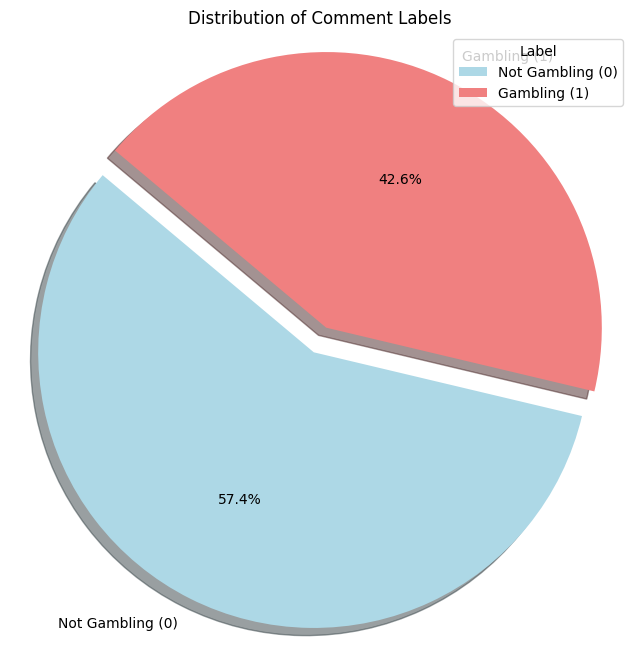

In [495]:
label_counts = df_combined['label'].value_counts()

# Labels for the pie chart
labels = ['Not Gambling (0)', 'Gambling (1)']
sizes = label_counts.values
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # explode the 1st slice (Not Gambling)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Comment Labels')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(title="Label")
plt.show()


## Model Development

### Judi Classification

In [496]:
df_combined.head(100)

,author,comment,normalizeText,casefoldingText,cleanText,fixSlangWords,tokenizingText,stopWordText,finalText,label
0,@HenhenDrodro,Yg belain org stres pasti g jauh klo g ODGJ y...,Yg belain org stres pasti g jauh klo g ODGJ y...,yg belain org stres pasti g jauh klo g odgj y...,yg belain org stres pasti g jauh klo g odgj y ...,yang belain orang stres pasti tidak jauh klo t...,"[yang, belain, orang, stres, pasti, tidak, jau...","[belain, orang, stres, klo, odgj, pskopat]",belain orang stres klo odgj pskopat,0
1,@merahkhatulistiwa9603,ijazah jokowi itu asli ...penelaah ilmiah itu ...,ijazah jokowi itu asli ...penelaah ilmiah itu ...,ijazah jokowi itu asli ...penelaah ilmiah itu ...,ijazah jokowi itu asli penelaah ilmiah itu han...,ijazah jokowi itu asli penelaah ilmiah itu han...,"[ijazah, jokowi, itu, asli, penelaah, ilmiah, ...","[ijazah, jokowi, asli, penelaah, ilmiah, meneb...",ijazah jokowi asli penelaah ilmiah menebak men...,0
2,@RinaManroe,Senyum2 Bae,Senyum2 Bae,senyum2 bae,senyum2 bae,senyum2 bae,"[senyum2, bae]","[senyum2, bae]",senyum2 bae,0
3,@DWPSCHANEL,Tangkap lah males dengernya …ribet,Tangkap lah males dengernya ...ribet,tangkap lah males dengernya ...ribet,tangkap lah males dengernya ribet,tangkap lah males dengernya ribet,"[tangkap, lah, males, dengernya, ribet]","[tangkap, males, dengernya, ribet]",tangkap males dengernya ribet,0
4,@dediharyanto9746,"Ga peduli sama ROY dan JOKOWI, dari sini udah ...","Ga peduli sama ROY dan JOKOWI, dari sini udah ...","ga peduli sama roy dan jokowi, dari sini udah ...",ga peduli sama roy dan jokowi dari sini udah k...,tidak peduli dengan roy dan jokowi dari sini s...,"[tidak, peduli, dengan, roy, dan, jokowi, dari...","[peduli, roy, jokowi, ketauan, hukum, indonesi...",peduli roy jokowi ketauan hukum indonesia raky...,0
...,...,...,...,...,...,...,...,...,...,...
97,@DwiNugroho-x9h,Tertawa lah kau roy.... Sebentar lagi kau nang...,Tertawa lah kau roy.... Sebentar lagi kau nang...,tertawa lah kau roy.... sebentar lagi kau nang...,tertawa lah kau roy sebentar lagi kau nangis2 ...,tertawa lah kau roy sebentar lagi kau nangis2 ...,"[tertawa, lah, kau, roy, sebentar, lagi, kau, ...","[tertawa, kau, roy, sebentar, kau, nangis2, hh...",tertawa kau roy sebentar kau nangis2 hhhhhhh s...,0
98,@STORIEKIWARAS,RS cs . .akan terus memburu hadiah 6m..\nYg di...,RS cs . .akan terus memburu hadiah 6m..\nYg di...,rs cs . .akan terus memburu hadiah 6m..\nyg di...,rs cs akan terus memburu hadiah 6m yg disaemba...,rs cs akan terus memburu hadiah 6m yang disaem...,"[rs, cs, akan, terus, memburu, hadiah, 6m, yan...","[rs, cs, memburu, hadiah, 6m, disaembarakan, l...",rs cs memburu hadiah 6m disaembarakan lupa men...,0
99,@jennymore3845,roy dan rismon ini produk UGM yg gagal.. sampa...,roy dan rismon ini produk UGM yg gagal.. sampa...,roy dan rismon ini produk ugm yg gagal.. sampa...,roy dan rismon ini produk ugm yg gagal sampah2...,roy dan rismon ini produk ugm yang gagal sampa...,"[roy, dan, rismon, ini, produk, ugm, yang, gag...","[roy, rismon, produk, ugm, gagal, sampah2, ben...",roy rismon produk ugm gagal sampah2 benci jokowi,0
100,@asepts-PsPanglipur,Udah lah... Tindak Hukum aja itu pembuat kegad...,Udah lah... Tindak Hukum aja itu pembuat kegad...,udah lah... tindak hukum aja itu pembuat kegad...,udah lah tindak hukum aja itu pembuat kegaduha...,sudah lah tindak hukum saja itu pembuat kegadu...,"[sudah, lah, tindak, hukum, saja, itu, pembuat...","[tindak, hukum, pembuat, kegaduhan, salah, pa,...",tindak hukum pembuat kegaduhan salah pa jokowi...,0


In [497]:
# Muat dataset
texts = df_combined['finalText'].astype(str).values
labels = df_combined['label'].values

In [498]:
# Fungsi augmentasi
def synonym_replacement(text, n=1):
      words = text.split()
      new_words = words.copy()
      stop_words = set(stopwords.words('indonesian'))

      words_to_replace = [word for word in words if word not in stop_words]
      random.shuffle(words_to_replace)

      num_replaced = 0
      for word in words_to_replace:
            synonyms = [word + '_syn']  # placeholder
            if synonyms:
                  synonym = random.choice(synonyms)
                  new_words = [synonym if w == word else w for w in new_words]
                  num_replaced += 1
            if num_replaced >= n:
                  break
      return ' '.join(new_words)

def augment_dataset(texts, labels, augment_ratio=0.3):
      augmented_texts = []
      augmented_labels = []
      for text, label in zip(texts, labels):
            if random.random() < augment_ratio:
                  new_text = synonym_replacement(text)
                  augmented_texts.append(new_text)
                  augmented_labels.append(label)
      return texts + augmented_texts, labels + augmented_labels


In [499]:
# Split the dataset into training and testing sets
# Augment sebelum split
texts_aug, labels_aug = augment_dataset(list(texts), list(labels), augment_ratio=0.3)

# Split data
train_texts, temp_texts, train_labels, temp_labels = train_test_split(
      texts_aug, labels_aug, test_size=0.3, random_state=42, stratify=labels_aug
)
val_texts, test_texts, val_labels, test_labels = train_test_split(
      temp_texts, temp_labels, test_size=0.5, random_state=42, stratify=temp_labels
)

In [500]:
# Konversi ke array 1D
train_texts = np.array(train_texts, dtype=object).flatten()
val_texts = np.array(val_texts, dtype=object).flatten()
test_texts = np.array(test_texts, dtype=object).flatten()

In [501]:
# Hyperparameters
MAX_VOCAB = 10000
MAX_LEN = 100
EMBED_DIM = 64

In [502]:
# Text vectorization layer
vectorizer = TextVectorization(
      max_tokens=MAX_VOCAB,
      output_mode='int',
      output_sequence_length=MAX_LEN
)
vectorizer.adapt(train_texts)

In [503]:
# Bangun model
model = Sequential([
      tf.keras.Input(shape=(), dtype=tf.string),
      vectorizer,
      Embedding(input_dim=MAX_VOCAB, output_dim=EMBED_DIM, mask_zero=True),
      Bidirectional(LSTM(64)),
      Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
      Dropout(0.5),
      Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization_10           │ (None, 100)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_10 (Embedding)        │ (None, 100, 64)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_10                │ (None, 128)            │        66,048 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 714,369 (2.73 MB)

 Trainable params: 714,369 (2.73 MB)

 Non-trainable params: 0 (0.00 B)

In [504]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')

# Training
model.fit(
    x=train_texts,
    y=np.array(train_labels),
    validation_data=(val_texts, np.array(val_labels)),
    batch_size=32,
    epochs=30,
    callbacks=[early_stop, checkpoint]
)

Epoch 1/30
452/452 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8754 - loss: 0.5854

452/452 ━━━━━━━━━━━━━━━━━━━━ 18s 32ms/step - accuracy: 0.8755 - loss: 0.5847 - val_accuracy: 0.9906 - val_loss: 0.0483
Epoch 2/30
452/452 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9946 - loss: 0.0384

452/452 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.9946 - loss: 0.0384 - val_accuracy: 0.9958 - val_loss: 0.0238
Epoch 3/30
452/452 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9983 - loss: 0.0153

452/452 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9983 - loss: 0.0153 - val_accuracy: 0.9961 - val_loss: 0.0200
Epoch 4/30
451/452 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9998 - loss: 0.0081

452/452 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.9998 - loss: 0.0081 - val_accuracy: 0.9958 - val_loss: 0.0174
Epoch 5/30
452/452 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9996 - loss: 0.0073 - val_accuracy: 0.9964 - val_loss: 0.0182
Epoch 6/30
451/452 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9999 - loss: 0.0057

452/452 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9999 - loss: 0.0057 - val_accuracy: 0.9971 - val_loss: 0.0147
Epoch 7/30
452/452 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.9999 - loss: 0.0047 - val_accuracy: 0.9955 - val_loss: 0.0198
Epoch 8/30
452/452 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.9986 - loss: 0.0125 - val_accuracy: 0.9952 - val_loss: 0.0215


In [505]:
# Prediksi dan laporan klasifikasi
y_pred_probs = model.predict(test_texts)
y_pred = (y_pred_probs >= 0.5).astype(int)

print(classification_report(test_labels, y_pred))

97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1782
           1       0.99      0.99      0.99      1315

    accuracy                           0.99      3097
   macro avg       0.99      0.99      0.99      3097
weighted avg       0.99      0.99      0.99      3097



In [506]:
def predict_multiple(texts):
      """
      Memprediksi daftar komentar apakah mengandung unsur judi atau tidak.
      Argumen:
            texts (List[str]): daftar komentar.
      Return:
            List[str]: daftar hasil prediksi "Judi Online" atau "Bukan Judi Online".
      """
      texts = np.array(texts, dtype=object)
      probs = model.predict(texts).flatten()
      results = ["Judi Online" if p >= 0.5 else "Bukan Judi Online" for p in probs]
      return results

# # Contoh penggunaan prediksi untuk multiple comments
sample_texts = [
      "roy suryo itu kan penjahat yang keluar dari penjara kok membuat ulah lagi",
      "semoga roy masuk penjara sebelum tgl juni biar tidak ikut nonton timnas main",
      "ya alloh ya rob penjarakan orang munafik",
      "sehat selalu semuanya salam dari weton88 mudah jackpot",
      "kerennn contentnya kakak cari situs yang benar itu weton88",
      "weton88 tempat paling uhuy"
]

predicted_results = predict_multiple(sample_texts)

for text, result in zip(sample_texts, predicted_results):
      print(f"Komentar: \"{text}\" -> Prediksi: {result}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Komentar: "roy suryo itu kan penjahat yang keluar dari penjara kok membuat ulah lagi" -> Prediksi: Bukan Judi Online
Komentar: "semoga roy masuk penjara sebelum tgl juni biar tidak ikut nonton timnas main" -> Prediksi: Judi Online
Komentar: "ya alloh ya rob penjarakan orang munafik" -> Prediksi: Bukan Judi Online
Komentar: "sehat selalu semuanya salam dari weton88 mudah jackpot" -> Prediksi: Judi Online
Komentar: "kerennn contentnya kakak cari situs yang benar itu weton88" -> Prediksi: Judi Online
Komentar: "weton88 tempat paling uhuy" -> Prediksi: Judi Online


In [507]:
# # simpan model dan tokenizer ke /models
# model.save_pretrained('./fine_tuned_indobert')
# tokenizer.save_pretrained('./fine_tuned_indobert')

In [508]:
# # load model dari drive dan gunakan untuk predict
# model = AutoModelForSequenceClassification.from_pretrained('models/fine_tuned_indobert')
# tokenizer = AutoTokenizer.from_pretrained('models/fine_tuned_indobert')

# # Perbarui fungsi predict untuk menggunakan model yang dimuat
# def predict_from_drive(text):
#       device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#       model.to(device)

#       inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=128)
#       inputs = {key: value.to(device) for key, value in inputs.items()}

#       model.eval()
#       with torch.no_grad():
#             outputs = model(**inputs)
#             prediction = outputs.logits.argmax().item()

#       return "Judi Online" if prediction == 1 else "Bukan Judi Online"

# # Perbarui fungsi predict_multiple untuk menggunakan model yang dimuat
# def predict_multiple_from_drive(texts):
#       device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#       model.to(device)

#       inputs = tokenizer(texts, return_tensors="pt", padding=True, truncation=True, max_length=128, return_token_type_ids=False)
#       inputs = {key: value.to(device) for key, value in inputs.items()}

#       model.eval()
#       with torch.no_grad():
#             outputs = model(**inputs)
#             predictions = outputs.logits.argmax(dim=1).tolist()

#       results = ["Judi Online" if pred == 1 else "Bukan Judi Online" for pred in predictions]
#       return results

# # Contoh penggunaan prediksi dengan model yang dimuat dari Drive
# sample_text_loaded = "ijazah jokowi itu asli penelaah ilmiah itu hanya menebak dan mengira2 dan kemudian di buat fitnah roy suryo adl mentri yang di pecat oleh jokowi sepintas saja tahu kemana larinya mereka"
# print("Prediksi dari model yang dimuat dari Drive (teks tunggal):")
# print(predict_from_drive(sample_text_loaded))

# sample_texts_loaded = [
#       "roy suryo itu kan penjahat yang keluar dari penjara kok membuat ulah lagi",
#       "semoga roy masuk penjara sebelum tgl juni biar tidak ikut nonton timnas main",
#       "ya alloh ya rob penjarakan orang munafik",
#       "sehat selalu semuanya salam dari weton88 mudah jackpot",
#       "kerennn contentnya kakak cari situs yang benar itu weton88",
#       "weton88 tempat paling uhuy"
# ]
# predicted_results_loaded = predict_multiple_from_drive(sample_texts_loaded)

# print("\nPrediksi dari model yang dimuat dari Drive (multiple teks):")
# for text, result in zip(sample_texts_loaded, predicted_results_loaded):
#       print(f"Komentar: \"{text}\" -> Prediksi: {result}")

### Sentiment Classification